In [72]:
# external imports
import copy
import multiprocessing

# local imports
from classes.cbnetwork import CBN
from classes.globaltopology import GlobalTopology
from classes.localtemplates import LocalNetworkTemplate

num_cpus = multiprocessing.cpu_count()

# pass the parameters
N_LOCAL_NETWORKS = 50
N_VARS_NETWORK = 20
N_OUTPUT_VARS = 2
N_INPUT_VARS = 2
V_TOPOLOGY = 2
N_MAX_CLAUSES = 2
N_MAX_LITERALS = 2

# GENERATE THE LOCAL NETWORK TEMPLATE
o_template = LocalNetworkTemplate(n_vars_network=N_VARS_NETWORK, n_input_variables=N_INPUT_VARS,
                                  n_output_variables=N_OUTPUT_VARS, n_max_of_clauses=N_MAX_CLAUSES,
                                  n_max_of_literals=N_MAX_LITERALS, v_topology=V_TOPOLOGY)

# GENERATE THE GLOBAL TOPOLOGY
o_global_topology = GlobalTopology.generate_sample_topology(v_topology=V_TOPOLOGY,
                                                            n_nodes=N_LOCAL_NETWORKS)

# generate aleatory CBN by topology
o_cbn = CBN.generate_cbn_from_template(v_topology=V_TOPOLOGY,
                                       n_local_networks=N_LOCAL_NETWORKS,
                                       n_vars_network=N_VARS_NETWORK,
                                       o_template=o_template,
                                       l_global_edges=o_global_topology.l_edges)

# Crear copias profundas del objeto original
o_cbn1 = copy.deepcopy(o_cbn) # Serial
o_cbn2 = copy.deepcopy(o_cbn) # Parallel Simple
o_cbn3 = copy.deepcopy(o_cbn) # Parallel with weights

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
-------------------------------

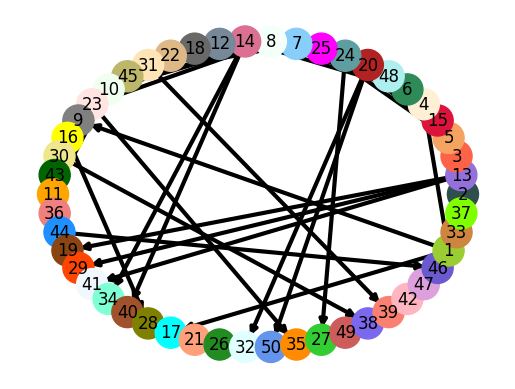

In [73]:
o_cbn1.plot_topology()

In [74]:
o_cbn1.find_local_attractors_sequential()

**************************************************
FIND LOCAL ATTRACTORS
--------------------------------------------------
FIND ATTRACTORS FOR NETWORK: 1
--------------------------------------------------
Network: 1  Local Scene: None
end find attractors
--------------------------------------------------
FIND ATTRACTORS FOR NETWORK: 2
--------------------------------------------------
Network: 2  Local Scene: 0
end find attractors
--------------------------------------------------
Network: 2  Local Scene: 1
end find attractors
--------------------------------------------------
FIND ATTRACTORS FOR NETWORK: 3
--------------------------------------------------
Network: 3  Local Scene: 0
end find attractors
--------------------------------------------------
Network: 3  Local Scene: 1
end find attractors
--------------------------------------------------
FIND ATTRACTORS FOR NETWORK: 4
--------------------------------------------------
Network: 4  Local Scene: 00
end find attractors
-------

In [75]:
o_cbn2.find_local_attractors_parallel(num_cpus=num_cpus)

**************************************************
FIND LOCAL ATTRACTORS PARALLEL
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------





--------------------------------------------------

FIND ATTRACTORS FOR NETWORK:
FIND ATTRACTORS FOR NETWORK:
--------------------------------------------------FIND ATTRACTORS FOR NETWORK:FIND ATTRACTORS FOR NETWORK:FIND ATTRACTORS FOR NETWORK:FIND ATTRACTORS FOR NETWORK:FIND ATTRACTORS FOR NETWORK:FIND ATTRACTORS FOR NETWORK:
 FIND ATTRACTORS FOR NETWORK: FIND ATTRACTORS FOR NETWORK: 
     9 FIND ATTRACTORS 

In [94]:
o_cbn3.find_local_attractors_parallel_with_weigths(num_cpus=1)

**************************************************
FIND LOCAL ATTRACTORS WEIGHTED BALANCED

Número de workers: 1
Distribución de tareas por bucket antes de la ejecución:
  Bucket 0: 50 tasks, total weight: 1050
--------------------------------------------------
FIND ATTRACTORS FOR NETWORK: 4
--------------------------------------------------
Network: 4  Local Scene: 00
end find attractors
--------------------------------------------------
Network: 4  Local Scene: 01
end find attractors
--------------------------------------------------
Network: 4  Local Scene: 10
end find attractors
--------------------------------------------------
Network: 4  Local Scene: 11
end find attractors
--------------------------------------------------
FIND ATTRACTORS FOR NETWORK: 2
--------------------------------------------------
Network: 2  Local Scene: 0
end find attractors
--------------------------------------------------
Network: 2  Local Scene: 1
end find attractors
---------------------------------

In [77]:
o_cbn1.show_local_attractors()

**************************************************
SHOW LOCAL ATTRACTORS
NETWORK 1
--------------------------------------------------
Network: 1 - Scene: [] - N. of Attractors: 1
Network: 1 - Scene: []
Attractors number: 1
--------------------------------------------------
Global index: 1 -> (1, 1, 1)
['1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1']
NETWORK 2
--------------------------------------------------
Network: 2 - Scene: 0 - N. of Attractors: 2
Network: 2 - Scene: 0
Attractors number: 2
--------------------------------------------------
Global index: 2 -> (2, 1, 1)
['0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0']
--------------------------------------------------
Global index: 3 -> (2, 1, 2)
['0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0']
--------------------------------------------------
Network: 2 - Scene: 1 - N

In [78]:
o_cbn2.show_local_attractors()

**************************************************
SHOW LOCAL ATTRACTORS
NETWORK 1
--------------------------------------------------
Network: 1 - Scene: [] - N. of Attractors: 1
Network: 1 - Scene: []
Attractors number: 1
--------------------------------------------------
Global index: 1 -> (1, 1, 1)
['1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1']
NETWORK 2
--------------------------------------------------
Network: 2 - Scene: 0 - N. of Attractors: 2
Network: 2 - Scene: 0
Attractors number: 2
--------------------------------------------------
Global index: 2 -> (2, 1, 1)
['0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0']
--------------------------------------------------
Global index: 3 -> (2, 1, 2)
['0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0']
--------------------------------------------------
Network: 2 - Scene: 1 - N

In [79]:
o_cbn3.show_local_attractors()

**************************************************
SHOW LOCAL ATTRACTORS
NETWORK 1
--------------------------------------------------
Network: 1 - Scene: [] - N. of Attractors: 1
Network: 1 - Scene: []
Attractors number: 1
--------------------------------------------------
Global index: 1 -> (1, 1, 1)
['1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1']
NETWORK 2
--------------------------------------------------
Network: 2 - Scene: 0 - N. of Attractors: 2
Network: 2 - Scene: 0
Attractors number: 2
--------------------------------------------------
Global index: 2 -> (2, 1, 1)
['0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0']
--------------------------------------------------
Global index: 3 -> (2, 1, 2)
['0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0']
--------------------------------------------------
Network: 2 - Scene: 1 - N

In [80]:
len(o_cbn3.l_local_networks)

50

In [81]:
o_cbn1.find_compatible_pairs()

**************************************************
FIND COMPATIBLE ATTRACTOR PAIRS
--------------------------------------------------
END FIND ATTRACTOR PAIRS


In [82]:
o_cbn2.find_compatible_pairs_parallel(num_cpus=num_cpus)

**************************************************
FIND COMPATIBLE ATTRACTOR PAIRS (PARALLEL)
Tareas creadas: 50
Resultados obtenidos: 50
--------------------------------------------------
END FIND COMPATIBLE ATTRACTOR PAIRS (Total pairs: 144)


In [83]:
o_cbn3.find_compatible_pairs_parallel_with_weights(num_cpus=num_cpus)

**************************************************
FIND COMPATIBLE ATTRACTOR PAIRS (PARALLEL WITH WEIGHTS)

Número de CPUs: 12
Distribución de tareas por bucket antes de la ejecución:
  Bucket 0: 4 tasks, total weight: 12
  Bucket 1: 3 tasks, total weight: 11
  Bucket 2: 4 tasks, total weight: 12
  Bucket 3: 4 tasks, total weight: 12
  Bucket 4: 4 tasks, total weight: 12
  Bucket 5: 4 tasks, total weight: 12
  Bucket 6: 4 tasks, total weight: 12
  Bucket 7: 4 tasks, total weight: 12
  Bucket 8: 4 tasks, total weight: 12
  Bucket 9: 5 tasks, total weight: 11
  Bucket 10: 5 tasks, total weight: 11
  Bucket 11: 5 tasks, total weight: 11

Número de tareas procesadas: 50
Total de pares de atractores: 144

Información final de los buckets:
  Bucket 0: 4 tasks, total weight: 12
  Bucket 1: 3 tasks, total weight: 11
  Bucket 2: 4 tasks, total weight: 12
  Bucket 3: 4 tasks, total weight: 12
  Bucket 4: 4 tasks, total weight: 12
  Bucket 5: 4 tasks, total weight: 12
  Bucket 6: 4 tasks, total w

In [84]:
o_cbn1.show_attractor_pairs()

LIST OF THE COMPATIBLE ATTRACTOR PAIRS
--------------------------------------------------
Edge: 2 -> 13
--------------------------------------------------
Coupling Variable: 1001, Scene: 0
--------------------------------------------------
Coupling Variable: 1001, Scene: 1
(2, 39)
(3, 39)
(4, 39)
--------------------------------------------------
Edge: 3 -> 5
--------------------------------------------------
Coupling Variable: 1002, Scene: 0
--------------------------------------------------
Coupling Variable: 1002, Scene: 1
(5, 15)
(6, 15)
(7, 15)
--------------------------------------------------
Edge: 3 -> 15
--------------------------------------------------
Coupling Variable: 1003, Scene: 0
--------------------------------------------------
Coupling Variable: 1003, Scene: 1
(5, 45)
(6, 45)
(7, 45)
--------------------------------------------------
Edge: 4 -> 6
--------------------------------------------------
Coupling Variable: 1004, Scene: 0
------------------------------------

In [85]:
o_cbn2.show_attractor_pairs()

LIST OF THE COMPATIBLE ATTRACTOR PAIRS
--------------------------------------------------
Edge: 2 -> 13
--------------------------------------------------
Coupling Variable: 1001, Scene: 0
--------------------------------------------------
Coupling Variable: 1001, Scene: 1
(2, 39)
(3, 39)
(4, 39)
--------------------------------------------------
Edge: 3 -> 5
--------------------------------------------------
Coupling Variable: 1002, Scene: 0
--------------------------------------------------
Coupling Variable: 1002, Scene: 1
(5, 15)
(6, 15)
(7, 15)
--------------------------------------------------
Edge: 3 -> 15
--------------------------------------------------
Coupling Variable: 1003, Scene: 0
--------------------------------------------------
Coupling Variable: 1003, Scene: 1
(5, 45)
(6, 45)
(7, 45)
--------------------------------------------------
Edge: 4 -> 6
--------------------------------------------------
Coupling Variable: 1004, Scene: 0
------------------------------------

In [86]:
o_cbn3.show_attractor_pairs()

LIST OF THE COMPATIBLE ATTRACTOR PAIRS
--------------------------------------------------
Edge: 2 -> 13
--------------------------------------------------
Coupling Variable: 1001, Scene: 0
--------------------------------------------------
Coupling Variable: 1001, Scene: 1
(2, 39)
(3, 39)
(4, 39)
--------------------------------------------------
Edge: 3 -> 5
--------------------------------------------------
Coupling Variable: 1002, Scene: 0
--------------------------------------------------
Coupling Variable: 1002, Scene: 1
(5, 15)
(6, 15)
(7, 15)
--------------------------------------------------
Edge: 3 -> 15
--------------------------------------------------
Coupling Variable: 1003, Scene: 0
--------------------------------------------------
Coupling Variable: 1003, Scene: 1
(5, 45)
(6, 45)
(7, 45)
--------------------------------------------------
Edge: 4 -> 6
--------------------------------------------------
Coupling Variable: 1004, Scene: 0
------------------------------------

In [95]:
o_cbn1.mount_stable_attractor_fields()

**************************************************
FIND ATTRACTOR FIELDS
--------------------------------------------------
END MOUNT ATTRACTOR FIELDS


In [88]:
# o_cbn1.show_attractors_fields()